In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [4]:
data = fetch_california_housing()
print(data)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [ ]:
X,y= data.data,data.target   #data and target are key names in dictionary
print(X,y)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]] [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


In [11]:
#Initialize models
number_of_estimators = 80   #defining number of base estimators
rf=RandomForestRegressor(n_estimators=number_of_estimators,random_state=42)
# Measure training time for Random Forest
start_time_rf = time.time()
print("start time is",start_time_rf)
rf.fit(X_train, y_train)
end_time_rf = time.time()
print("end time is",end_time_rf)
rf_train_time = end_time_rf - start_time_rf
print("Total time for random forest is :",rf_train_time)




start time is 1747809883.84254
end time is 1747809892.8734617
Total time for random forest is : 9.030921697616577


In [12]:
xgb = XGBRegressor(n_estimators=number_of_estimators, random_state=42)
start_time_xgb = time.time()
print("start time is",start_time_xgb)
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
print("end time is",end_time_xgb)
xgb_train_time = end_time_xgb - start_time_xgb
print("Total time for xgboost is :",xgb_train_time)

start time is 1747810021.2435942
end time is 1747810023.0451748
Total time for xgboost is : 1.8015806674957275


In [ ]:
# Measure prediction time for Random Forest
start_time_rf =time.time() 
y_pred_rf = rf.predict(X_test)
print(y_test,y_pred_rf) #compare y_test with y_predict
end_time_rf = time.time()
rf_pred_time = end_time_rf-start_time_rf

# Measure prediction time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
print(y_test,y_pred_xgb)
end_time_xgb = time.time()
xgb_pred_time =end_time_xgb-start_time_xgb

[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ] [0.515225   0.741925   4.93010737 ... 4.765759   0.7135     1.669     ]
[0.477   0.458   5.00001 ... 5.00001 0.723   1.515  ] [0.6184912  0.81605226 5.178845   ... 5.0524106  0.77928525 1.8249824 ]


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test,y_pred_xgb)
r2_rf =r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test,y_pred_xgb)
print(f'Random Forest:  MSE = {mse_rf:.2f}, R^2 = {r2_rf:.2f}')
print(f'XGBoost:  MSE = {mse_xgb:.2f}, R^2 = {r2_xgb:.2f}')
#From Output we can see that XGBoost is better than Random Forest

Random Forest:  MSE = 0.26, R^2 = 0.80
XGBoost:  MSE = 0.23, R^2 = 0.83


In [21]:
standard_deviation =np.std(y_test)
print(standard_deviation)

1.1447309632576992


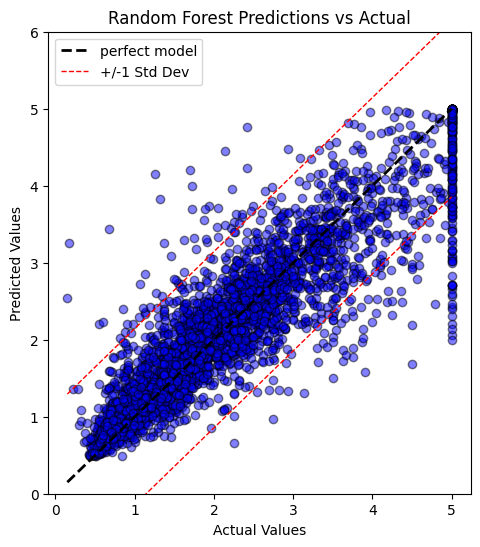

In [22]:
plt.figure(figsize=(12, 6))
# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + standard_deviation, y_test.max() + standard_deviation], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - standard_deviation, y_test.max() - standard_deviation], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()